In [13]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=12)

# Filter out deprecated warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_excel('../../data/market_data.xlsx')

In [15]:
vic_data = data[['Time (UTC+10)', 'Regions VIC Trading Price ($/MWh)', 
                 'Regions VIC Trading Total Intermittent Generation (MW)', 
                 'Regions VIC Operational Demand (MW)']]

In [16]:
TIME = 'Time (UTC+10)'
PRICE = 'Regions VIC Trading Price ($/MWh)'
GENERATION = 'Regions VIC Trading Total Intermittent Generation (MW)'
DEMAND = 'Regions VIC Operational Demand (MW)'

In [41]:
# 3rd deliverable
#vic_data.loc[(vic_data[TIME] >= '2020-07-17 00:00:00') & (vic_data[TIME] < '2020-07-18 00:00:00')]

# Max price is 163.47 at 18:00
# Revenue = (580 * 0.9) * 163.47 = 85331.34
# 0.9 = discharge efficiency

# Since the battery starts the day discharged, 
# price is 79.09
# Revenue = (580 * 0.9) * 79.09 = 41284.98

# Minimum price of 39.75 at 14:00:00
# Cost = (580 * 0.9 ) * 39.75 = 20749.5

# Profit = 41284.98 - 20749.5 + 85331.34 = 105866.82

In [17]:
vic_data['weekday'] = vic_data[TIME].apply(lambda t: t.weekday())

# Add 1 to weekday, so 1 will represent Monday ... 7 represents Sunday
vic_data['weekday'] = vic_data['weekday'] + 1

vic_data['hour'] = vic_data[TIME].apply(lambda t: t.hour)

In [40]:
vic_data[vic_data[PRICE] == 14700]

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),weekday,hour
36511,2020-01-31 15:30:00,14700.0,144.50,9283,5,15
36514,2020-01-31 17:00:00,14700.0,113.91,9667,5,17


In [18]:
# Average data according to day of the week and hour of the day
day_df = vic_data.groupby(by=['weekday']).mean()
day_df

,Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),hour
weekday,,,,
1,74.303080,170.225486,5172.871803,11.500000
2,77.155654,173.422223,5233.259149,11.500000
3,79.834678,158.304530,5235.694665,11.500000
4,100.062319,168.041322,5298.832231,11.500000
5,95.853342,173.862479,5261.262015,11.500000
6,63.338851,176.760521,4766.736993,11.500000
7,60.586150,162.554547,4610.075014,11.498726


In [19]:
hour_df = vic_data.groupby(by=['hour']).mean()
hour_df

,Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),weekday
hour,,,,
0,73.535406,168.893127,4917.977316,3.998866
1,59.881176,167.541751,4605.240923,3.997731
2,50.280231,167.586672,4323.489032,3.997731
3,44.901725,168.617943,4161.896747,3.997731
4,45.044890,170.399119,4153.913389,3.997731
5,53.206536,171.673253,4335.626702,3.997731
6,68.447829,171.079032,4751.221256,3.997731
7,83.800015,167.880855,5177.510968,3.997731
8,82.669977,165.098385,5371.386157,3.997731


<AxesSubplot:xlabel='weekday', ylabel='Regions VIC Trading Price ($/MWh)'>

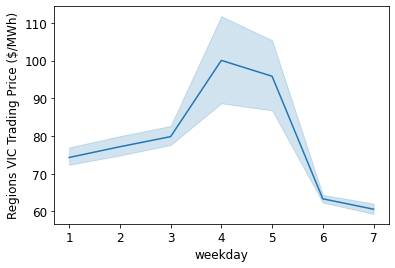

In [20]:
sns.lineplot(x=vic_data['weekday'], y=vic_data[PRICE], ci=95)

<AxesSubplot:xlabel='weekday', ylabel='Regions VIC Operational Demand (MW)'>

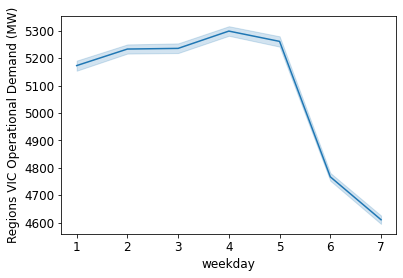

In [21]:
sns.lineplot(x=vic_data['weekday'], y=vic_data[DEMAND], ci=95)

<AxesSubplot:xlabel='hour', ylabel='Regions VIC Trading Price ($/MWh)'>

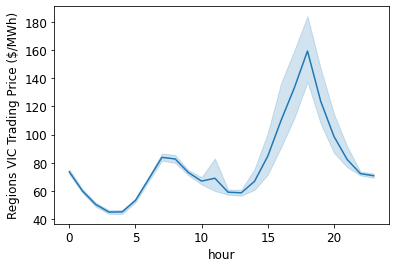

In [22]:
sns.lineplot(x=vic_data['hour'], y=vic_data[PRICE], ci = 95)

<AxesSubplot:xlabel='hour', ylabel='Regions VIC Operational Demand (MW)'>

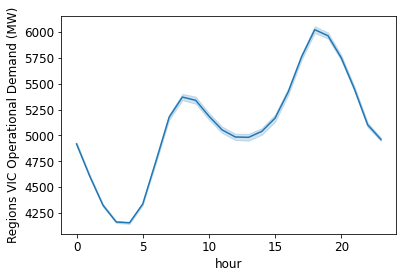

In [23]:
sns.lineplot(x=vic_data['hour'], y=vic_data[DEMAND], ci=95)